In [27]:
import os
import re
from glob import glob
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

In [2]:
root_path = "../../Data/Experiment_6_7"

In [22]:
data = {re.findall("noise_(\w+)\.", p)[0]: np.load(p) for p in glob(os.path.join(root_path, "*"))}
for k, v in data.items(): print(k, v.shape)

achrom (5, 21, 256, 256, 3)
red_green (5, 21, 256, 256, 3)
yellow_blue (5, 21, 256, 256, 3)


In [24]:
freqs = np.array([1.5, 3, 6, 12, 24])
freqs

array([ 1.5,  3. ,  6. , 12. , 24. ])

In [23]:
# for name, chroma in data.items():
#     for dat in chroma:
#         fig, axes = plt.subplots(1,len(dat))
#         for ax, d in zip(axes.ravel(), dat):
#             ax.imshow(d)
#             ax.axis("off")
#         plt.show()

In [25]:
def model(img):
    return img
def calculate_diffs(img1, img2):
    a, b = model(img1), model(img2)
    return ((a-b)**2).mean(axis=(1,2,3))**(1/2)

In [30]:
diffs = defaultdict(dict)
for name, chroma in data.items():
    for f, dat in zip(freqs, chroma):
        diffs_ = calculate_diffs(dat, dat[0:1])
        diffs[name][f] = diffs_

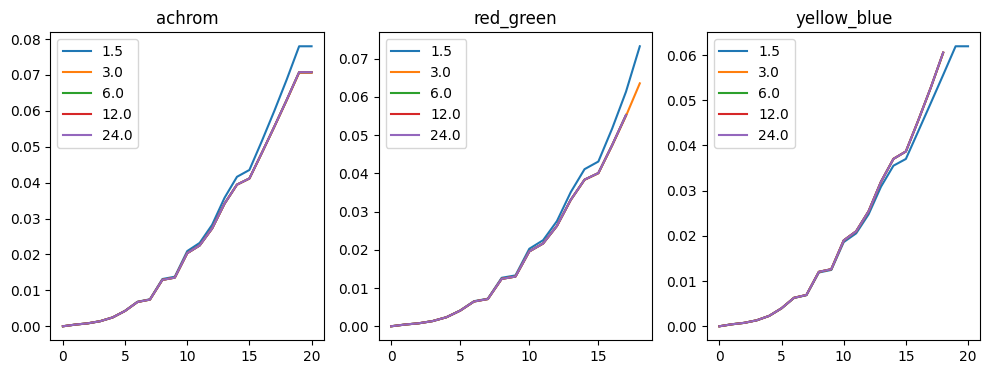

In [44]:
fig, axes = plt.subplots(1,len(diffs), figsize=(12,4))
for (name, chroma), ax in zip(diffs.items(), axes.ravel()):
    for f, dat in chroma.items():
        ax.plot(dat, label=f)
    ax.legend()
    ax.set_title(name)
plt.show()